<a href="https://colab.research.google.com/github/ashigupta99/Finlatics_Python_ML/blob/main/Aashi_Gupta_AdOnline_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
dataset=pd.read_csv('Online.csv')

# **Ques1**

In [ ]:
print(dataset['user_engagement'].value_counts())

user_engagement
Medium    5489
Low       5035
High      4884
Name: count, dtype: int64


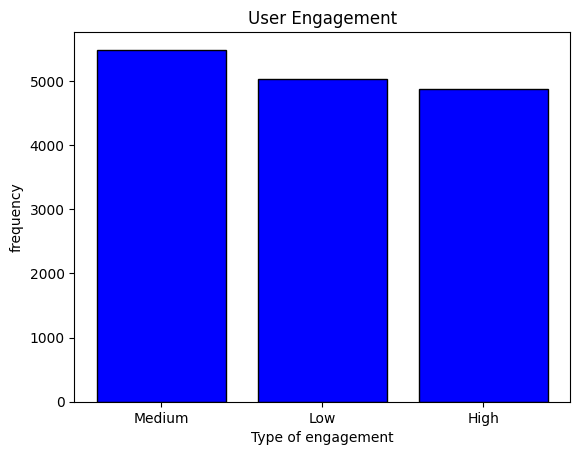

In [ ]:
cou=dataset['user_engagement'].value_counts()
plt.xlabel("Type of engagement")
plt.ylabel("frequency")
plt.bar(x=cou.index,height=cou.values,color='blue', edgecolor='black')
plt.title('User Engagement')
plt.show()

# **Ques2**

In [ ]:
dataset.groupby('banner')['clicks'].sum()

,clicks
banner,
160 x 600,239570
240 x 400,1113256
300 x 250,411214
468 x 60,1295
580 x 400,120681
670 x 90,37203
728 x 90,569606
800 x 250,12


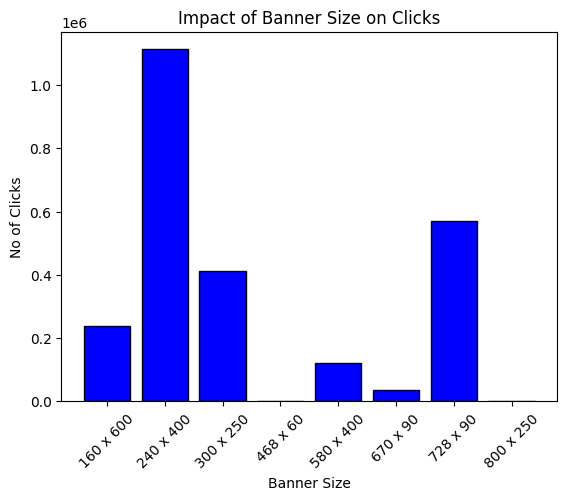

In [ ]:
cou=dataset.groupby('banner')['clicks'].sum()
plt.xlabel("Banner Size")
plt.ylabel("No of Clicks")
plt.bar(x=cou.index,height=cou.values, color='blue', edgecolor='black')
plt.title('Impact of Banner Size on Clicks')
plt.xticks(rotation=45)
plt.show()

# **Ques3**

In [ ]:
dataset['sum']=dataset['clicks']+dataset['displays']

In [ ]:
dataset.groupby('placement')[['clicks','displays','sum']].sum()

,clicks,displays,sum
placement,,,
abc,1584,242142,243726
def,176097,28177492,28353589
ghi,1247049,59740415,60987464
jkl,75063,7692732,7767795
mno,993039,143161775,144154814


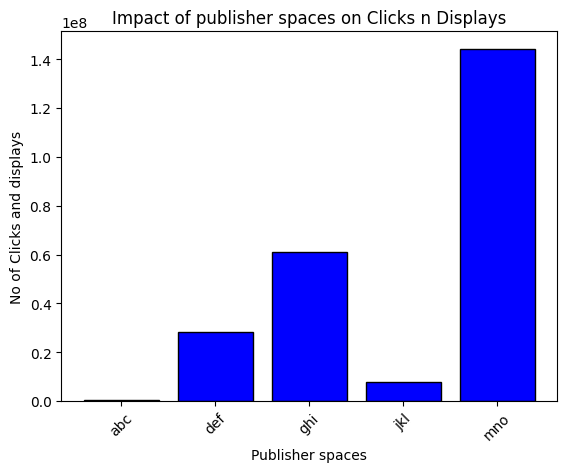

In [ ]:
cou=dataset.groupby('placement')['sum'].sum()
plt.xlabel("Publisher spaces")
plt.ylabel("No of Clicks and displays")
plt.bar(x=cou.index,height=cou.values, color='blue', edgecolor='black')
plt.title('Impact of publisher spaces on Clicks n Displays')
plt.xticks(rotation=45)
plt.show()

# **Ques4**

In [ ]:
corr= dataset[['cost','revenue']].corr()
print(corr)

            cost  revenue
cost     1.00000  0.76052
revenue  0.76052  1.00000


Strong positive correlation of 0.76, high cost of serving ads leads to more revenue generated

# **Ques5**

Per click cost is 0.11

In [ ]:
x=dataset['revenue'].sum()
y=dataset['clicks'].sum()
print(x/y)

0.1108233559193802


# **Ques6**

Campaign 1 has highest post click conversion rates

In [ ]:
dataset.groupby('campaign_number')['post_click_conversions'].sum()
#Post click conversion numbers

,post_click_conversions
campaign_number,
camp 1,633085
camp 2,13767
camp 3,4916


In [ ]:
print(dataset.groupby('campaign_number')['post_click_conversions'].sum()/dataset.groupby('campaign_number')['clicks'].sum())
#Post click conversion rates

campaign_number
camp 1    0.449272
camp 2    0.015624
camp 3    0.024271
dtype: float64


# **Ques7**

In [ ]:
dataset.groupby('month')['post_click_sales_amount'].sum()

,post_click_sales_amount
month,
April,1.319614e+07
June,7.801759e+06
May,1.171772e+07


post click sales amount decreases over time from April to May to June

# **Ques8**

User engagements varying across banner sizes

In [ ]:
dataset.groupby(['banner','user_engagement'])['user_engagement'].count()

banner     user_engagement
160 x 600  High                573
           Low                 590
           Medium              642
240 x 400  High                729
           Low                 848
           Medium              848
300 x 250  High                872
           Low                 949
           Medium              999
468 x 60   High                637
           Low                 563
           Medium              699
580 x 400  High                182
           Low                 212
           Medium              212
670 x 90   High                728
           Low                 777
           Medium              847
728 x 90   High               1018
           Low                1007
           Medium             1117
800 x 250  High                145
           Low                  89
           Medium              125
Name: user_engagement, dtype: int64

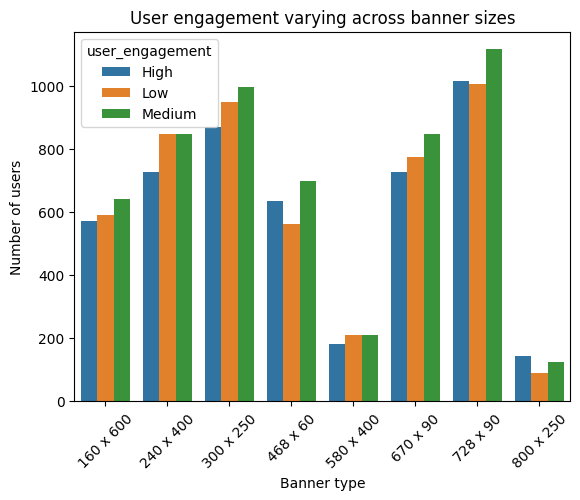

In [ ]:
sns.countplot(x='banner',hue='user_engagement',data=dataset)
plt.xlabel("Banner type")
plt.ylabel("Number of users")
plt.title("User engagement varying across banner sizes")
plt.xticks(rotation=45)
plt.show()

# **Ques9**

abc placement has the highest post click conversion rate

In [ ]:
dataset.groupby('placement')['post_click_conversions'].sum()
#Post click conversion numbers

,post_click_conversions
placement,
abc,824
def,29856
ghi,337063
jkl,20853
mno,263170


In [ ]:
print(dataset.groupby('placement')['post_click_conversions'].sum()/dataset.groupby('placement')['clicks'].sum())
#Post click conversion rates

placement
abc    0.520202
def    0.169543
ghi    0.270288
jkl    0.277807
mno    0.265015
dtype: float64


# **Ques10**

Clicks and displays decrease significantly every month

In [ ]:
dataset.groupby('month')[['clicks','displays']].sum()

,clicks,displays
month,,
April,1661125,128866631
June,291808,44094487
May,539904,66056607


# **Ques11**

The user engagement and revenue has strong positive correlation, more the user engagement, more the revenue

In [ ]:
dataset['user_engagement'] = dataset['user_engagement'].replace({'High': 2, 'Medium': 1,'Low':0})
rev=dataset.groupby('user_engagement')['revenue'].sum()
dataset['revenue_sum']=dataset['user_engagement'].map(rev)
corr= dataset[['user_engagement','revenue_sum']].corr()
print(corr)

                 user_engagement  revenue_sum
user_engagement         1.000000     0.960922
revenue_sum             0.960922     1.000000


<ipython-input-22-fe102a4d79c2>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['user_engagement'] = dataset['user_engagement'].replace({'High': 2, 'Medium': 1,'Low':0})


# **Ques12**

In [ ]:
print(dataset[['cost','clicks','revenue']].describe())

               cost        clicks       revenue
count  15408.000000  15408.000000  15408.000000
mean      11.370262    161.788487     17.929943
std       45.369499    728.276911     96.781834
min        0.000000      0.000000      0.000000
25%        0.024000      0.000000      0.000000
50%        0.339850      6.000000      0.483950
75%        2.536225     53.000000      3.839800
max      556.704800  14566.000000   2096.211600


In [ ]:
def outl(data):
  q1=data.quantile(0.25)
  q3=data.quantile(0.75)
  iqr=q3-q1
  upp=q3+1.5*iqr
  low=q1-1.5*iqr
  return low,upp
print(outl(dataset['cost']))
print(outl(dataset['clicks']))
print(outl(dataset['revenue']))

(-3.7443375, 6.304562499999999)
(-79.5, 132.5)
(-5.7597, 9.599499999999999)


All values below low value and above upp value are outliers

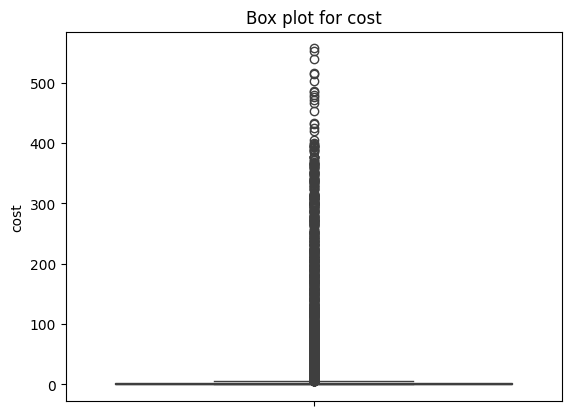

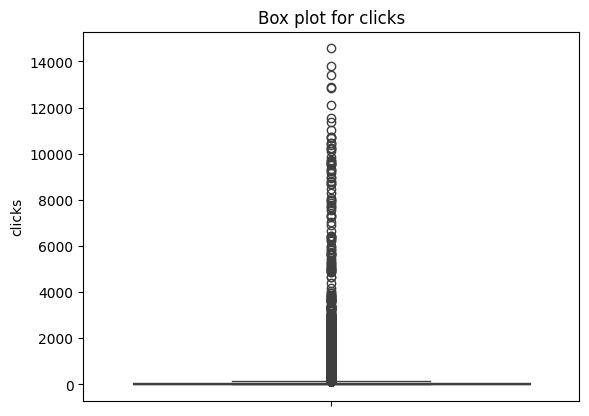

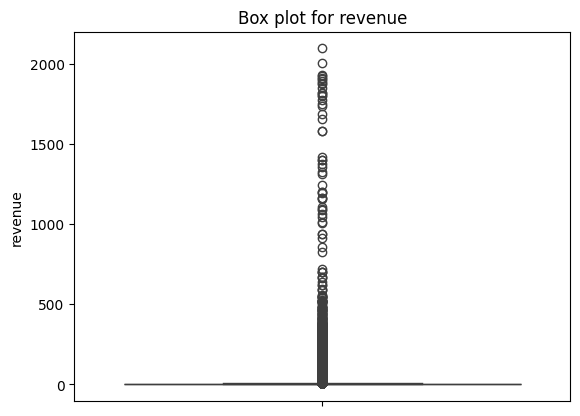

In [ ]:
sns.boxplot(y='cost',data=dataset)
plt.title('Box plot for cost')
plt.show()
sns.boxplot(y='clicks',data=dataset)
plt.title('Box plot for clicks')
plt.show()
sns.boxplot(y='revenue',data=dataset)
plt.title('Box plot for revenue')
plt.show()

# **Ques13**

Effectiveness of campaigns can be judged based on clicks, revenue and conversions

In [ ]:
dataset.groupby(['banner'])[['clicks','revenue','post_click_conversions']].sum()

,clicks,revenue,post_click_conversions
banner,,,
160 x 600,239570,23516.1292,48786
240 x 400,1113256,129930.2464,269865
300 x 250,411214,43171.3532,119790
468 x 60,1295,87.5847,550
580 x 400,120681,11193.1428,31759
670 x 90,37203,4022.8618,10619
728 x 90,569606,64342.1614,170396
800 x 250,12,1.0826,3


<ipython-input-27-86e9ad0e5572>:8: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.barplot(data=melted_data, x='banner', y='Value', hue='Metric', color='red')


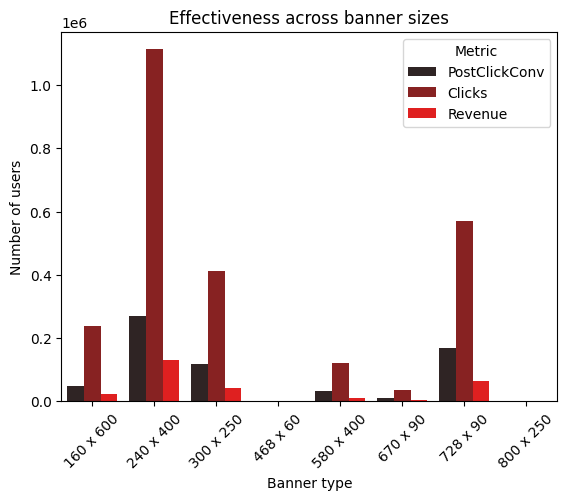

In [ ]:
s1=dataset.groupby('banner')['post_click_conversions'].sum()
dataset['PostClickConv']=dataset['banner'].map(s1)
s2=dataset.groupby('banner')['clicks'].sum()
dataset['Clicks']=dataset['banner'].map(s2)
s3=dataset.groupby('banner')['revenue'].sum()
dataset['Revenue']=dataset['banner'].map(s3)
melted_data = pd.melt(dataset, id_vars=['banner'], value_vars=['PostClickConv', 'Clicks', 'Revenue'], var_name='Metric', value_name='Value')
sns.barplot(data=melted_data, x='banner', y='Value', hue='Metric', color='red')
plt.xlabel("Banner type")
plt.ylabel("Number of users")
plt.title("Effectiveness across banner sizes")
plt.xticks(rotation=45)
plt.show()

240 x 400 is most effective banner

In [ ]:
dataset.groupby(['placement'])[['clicks','revenue','post_click_conversions']].sum()

,clicks,revenue,post_click_conversions
placement,,,
abc,1584,140.2604,824
def,176097,15861.2356,29856
ghi,1247049,151548.1020,337063
jkl,75063,8254.4889,20853
mno,993039,100460.1798,263170


<ipython-input-29-e90d8f448556>:8: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.barplot(data=melted_data, x='placement', y='Value', hue='Metric', color='red')


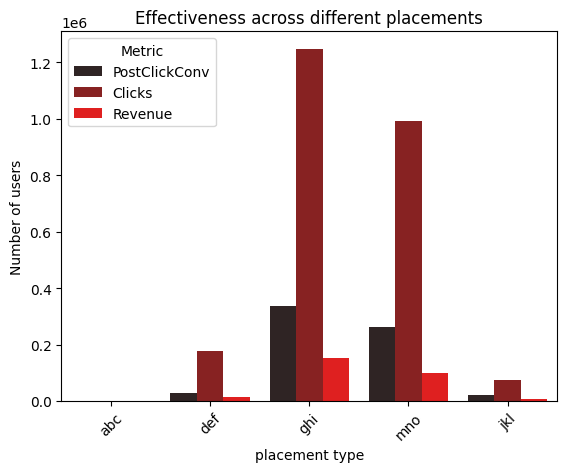

In [ ]:
s1=dataset.groupby('placement')['post_click_conversions'].sum()
dataset['PostClickConv']=dataset['placement'].map(s1)
s2=dataset.groupby('placement')['clicks'].sum()
dataset['Clicks']=dataset['placement'].map(s2)
s3=dataset.groupby('placement')['revenue'].sum()
dataset['Revenue']=dataset['placement'].map(s3)
melted_data = pd.melt(dataset, id_vars=['placement'], value_vars=['PostClickConv', 'Clicks', 'Revenue'], var_name='Metric', value_name='Value')
sns.barplot(data=melted_data, x='placement', y='Value', hue='Metric', color='red')
plt.xlabel("placement type")
plt.ylabel("Number of users")
plt.title("Effectiveness across different placements")
plt.xticks(rotation=45)
plt.show()

ghi is most effective placement type

# **Ques14**

In [ ]:
dataset['sub']=dataset['revenue']-dataset['cost']

In [ ]:
sumc=dataset.groupby('campaign_number')['sub'].sum()
div=dataset.groupby('campaign_number')['cost'].sum()
print(sumc/div)

campaign_number
camp 1    0.529879
camp 2    1.047878
camp 3    0.451546
dtype: float64


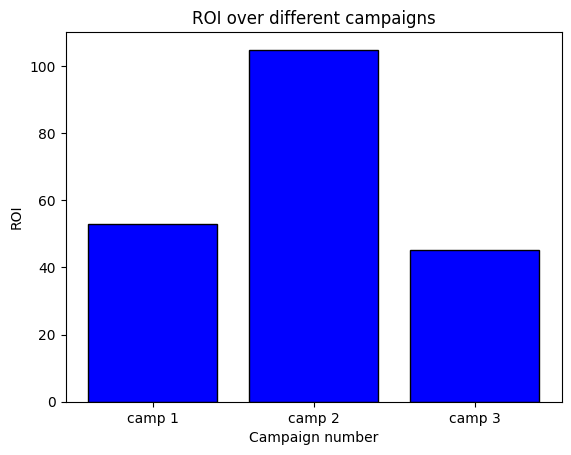

In [ ]:
x=sumc/div*100
plt.xlabel("Campaign number")
plt.ylabel("ROI")
plt.bar(x.index,x.values,color='blue', edgecolor='black')
plt.title('ROI over different campaigns')
plt.show()

Campaign 2 outperformed.

In [ ]:
sumc=dataset.groupby('banner')['sub'].sum()
div=dataset.groupby('banner')['cost'].sum()
print(sumc/div)

banner
160 x 600    0.342518
240 x 400    1.303090
300 x 250    0.218204
468 x 60    -0.545372
580 x 400    0.246651
670 x 90     0.053669
728 x 90     0.217899
800 x 250   -0.613412
dtype: float64


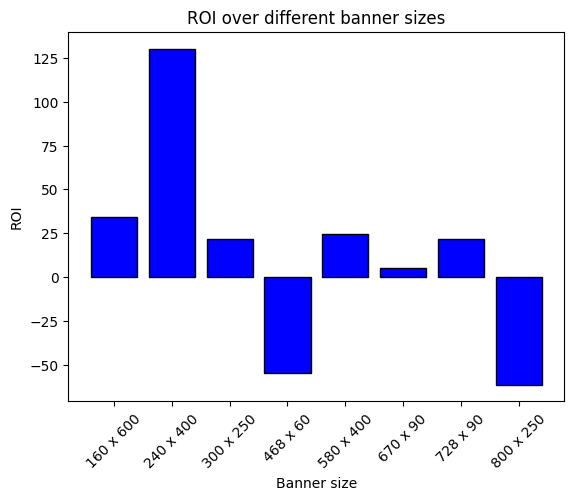

In [ ]:
y=sumc/div*100
plt.xlabel("Banner size")
plt.ylabel("ROI")
plt.bar(y.index,y.values,color='blue', edgecolor='black')
plt.title('ROI over different banner sizes')
plt.xticks(rotation=45)
plt.show()

240x400 banner size outperformed

# **Ques15**

In [ ]:
dataset.groupby('placement')['post_click_conversions'].sum()

,post_click_conversions
placement,
abc,824
def,29856
ghi,337063
jkl,20853
mno,263170


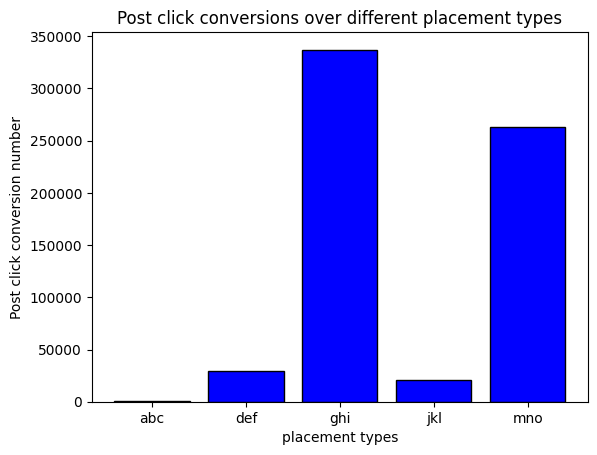

In [ ]:
cou=dataset.groupby('placement')['post_click_conversions'].sum()
plt.xlabel("placement types")
plt.ylabel("Post click conversion number")
plt.bar(cou.index, cou.values,color='blue', edgecolor='black')
plt.title('Post click conversions over different placement types')
plt.show()

# **Ques16**

In [ ]:
pd.set_option('display.max_rows',None)
dataset['year'] = 2020
dataset['date']=pd.to_datetime(dataset[['year','month','day']].astype(str).agg('-'.join,axis=1))
dataset['dayw']=dataset['date'].dt.day_name()
dataset['dayt']=dataset['dayw'].apply(lambda x:'Weekend' if x in ['Saturday','Sunday'] else 'Weekday')
dataset['cou']=dataset['dayt'].value_counts()
dataset['user_engagement']=dataset['user_engagement'].replace({2:'High',1:'Medium',0:'Low'})
dataset.groupby('dayt')['user_engagement'].value_counts()/dataset['dayt'].value_counts()

dayt     user_engagement
Weekday  Medium             0.356364
         Low                0.327545
         High               0.316091
Weekend  Medium             0.355944
         Low                0.324864
         High               0.319192
Name: count, dtype: float64

On weekends, high user interaction is more, medium and low interaction is slightly more on weekdays

<ipython-input-38-02325f1a18d3>:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.barplot(x='dayt',y='count',hue='user_engagement',data=k,color='blue',edgecolor='black')


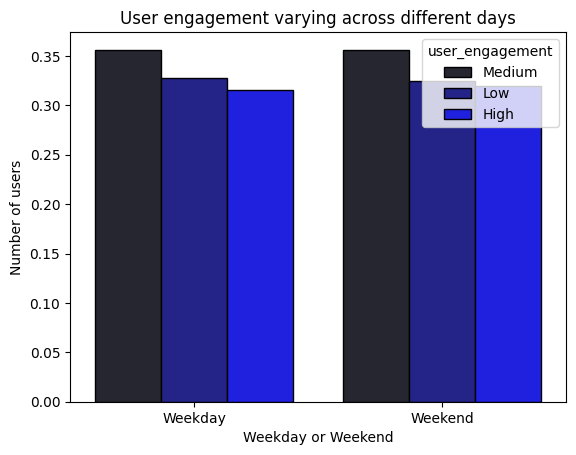

In [ ]:
k=(dataset.groupby('dayt')['user_engagement'].value_counts()/dataset['dayt'].value_counts())
k=k.reset_index(name='count')
sns.barplot(x='dayt',y='count',hue='user_engagement',data=k,color='blue',edgecolor='black')
plt.xlabel("Weekday or Weekend")
plt.ylabel("Number of users")
plt.title("User engagement varying across different days")
plt.show()


# **Ques17**

In [ ]:
y=dataset.groupby('campaign_number')['cost'].sum()/dataset.groupby('campaign_number')['clicks'].sum()
print(y)

campaign_number
camp 1    0.106937
camp 2    0.019335
camp 3    0.036867
dtype: float64


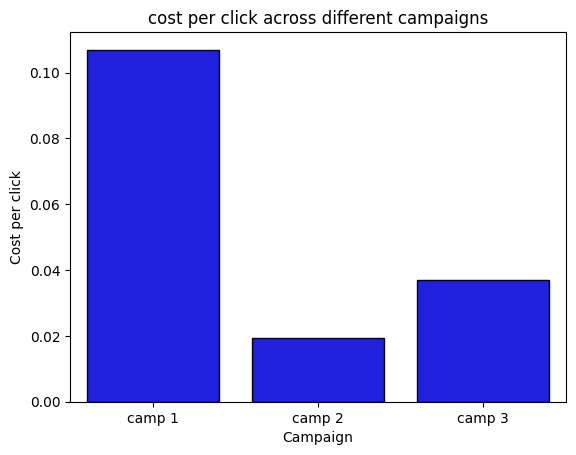

In [ ]:
k=dataset.groupby('campaign_number')['cost'].sum()/dataset.groupby('campaign_number')['clicks'].sum()
k=k.reset_index(name='cpc')
sns.barplot(x='campaign_number',y='cpc',data=k,color='blue',edgecolor='black')
plt.xlabel("Campaign")
plt.ylabel("Cost per click")
plt.title("cost per click across different campaigns")
plt.show()

In [ ]:
y=dataset.groupby('banner')['cost'].sum()/dataset.groupby('banner')['clicks'].sum()
print(y)

banner
160 x 600    0.073116
240 x 400    0.050676
300 x 250    0.086180
468 x 60     0.148766
580 x 400    0.074399
670 x 90     0.102625
728 x 90     0.092749
800 x 250    0.233367
dtype: float64


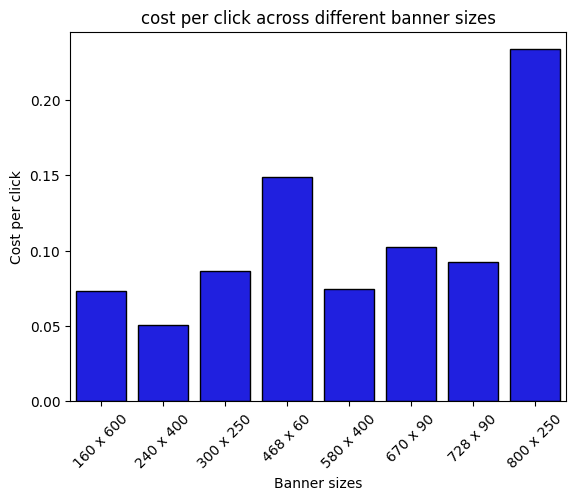

In [ ]:
k=dataset.groupby('banner')['cost'].sum()/dataset.groupby('banner')['clicks'].sum()
k=k.reset_index(name='cpc')
sns.barplot(x='banner',y='cpc',data=k,color='blue',edgecolor='black')
plt.xlabel("Banner sizes")
plt.ylabel("Cost per click")
plt.title("cost per click across different banner sizes")
plt.xticks(rotation=45)
plt.show()

# **Ques18**

In [ ]:
y=dataset.groupby('campaign_number')['post_click_conversions'].sum()/dataset.groupby('campaign_number')['cost'].sum()
print(y)

campaign_number
camp 1    4.201281
camp 2    0.808048
camp 3    0.658358
dtype: float64


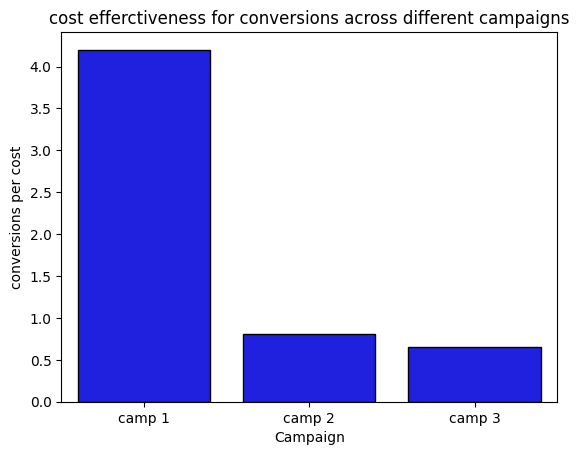

In [ ]:
k=dataset.groupby('campaign_number')['post_click_conversions'].sum()/dataset.groupby('campaign_number')['cost'].sum()
k=k.reset_index(name='costeff')
sns.barplot(x='campaign_number',y='costeff',data=k,color='blue',edgecolor='black')
plt.xlabel("Campaign")
plt.ylabel("conversions per cost")
plt.title("cost efferctiveness for conversions across different campaigns")
plt.show()

Campaign 1 is most cost effective for post click conversions

In [ ]:
y=dataset.groupby('banner')['post_click_conversions'].sum()/dataset.groupby('banner')['cost'].sum()
print(y)

banner
160 x 600    2.785156
240 x 400    4.783516
300 x 250    3.380220
468 x 60     2.854897
580 x 400    3.537199
670 x 90     2.781331
728 x 90     3.225338
800 x 250    1.071276
dtype: float64


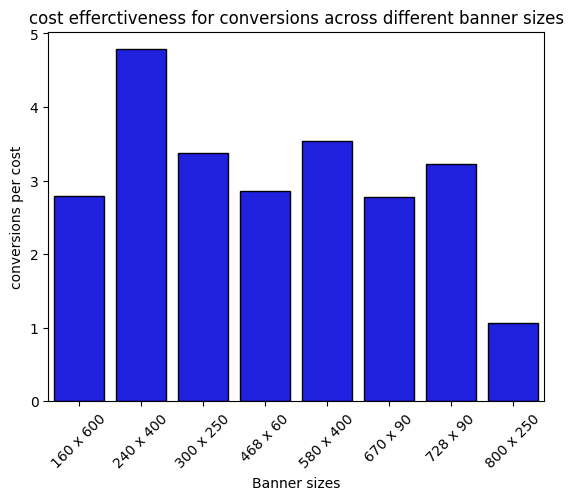

In [ ]:
k=dataset.groupby('banner')['post_click_conversions'].sum()/dataset.groupby('banner')['cost'].sum()
k=k.reset_index(name='costeff')
sns.barplot(x='banner',y='costeff',data=k,color='blue',edgecolor='black')
plt.xlabel("Banner sizes")
plt.ylabel("conversions per cost")
plt.title("cost efferctiveness for conversions across different banner sizes")
plt.xticks(rotation=45)
plt.show()

240x400 banner is most cost effective for post click conversions

# **Ques19**

In [ ]:
pd.set_option('display.max_rows',None)
dataset['year'] = 2020
dataset['date']=pd.to_datetime(dataset[['year','month','day']].astype(str).agg('-'.join,axis=1))
dataset['dayw']=dataset['date'].dt.day_name()
x=dataset.groupby('dayw')['post_click_conversions'].sum()/dataset.groupby('dayw')['clicks'].sum()
print(x)

dayw
Friday       0.270088
Monday       0.268471
Saturday     0.250378
Sunday       0.260899
Thursday     0.260372
Tuesday      0.274550
Wednesday    0.248423
dtype: float64


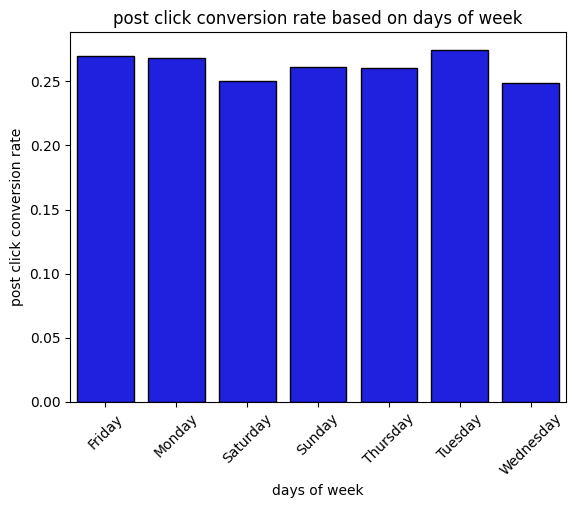

In [ ]:
k=dataset.groupby('dayw')['post_click_conversions'].sum()/dataset.groupby('dayw')['clicks'].sum()
k=k.reset_index(name='pccr')
sns.barplot(x='dayw',y='pccr',data=k,color='blue',edgecolor='black')
plt.xlabel("days of week")
plt.ylabel("post click conversion rate")
plt.title("post click conversion rate based on days of week")
plt.xticks(rotation=45)
plt.show()

# **Ques20**

In [ ]:
dataset.groupby(['campaign_number','user_engagement'])['post_click_conversions'].sum()

campaign_number  user_engagement
camp 1           High               617241
                 Low                   595
                 Medium              15249
camp 2           Low                   844
                 Medium              12923
camp 3           High                 3681
                 Low                   150
                 Medium               1085
Name: post_click_conversions, dtype: int64

<ipython-input-50-25a8c70657a7>:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.barplot(x='campaign_number',y='count',hue='user_engagement',data=k,color='blue',edgecolor='black')


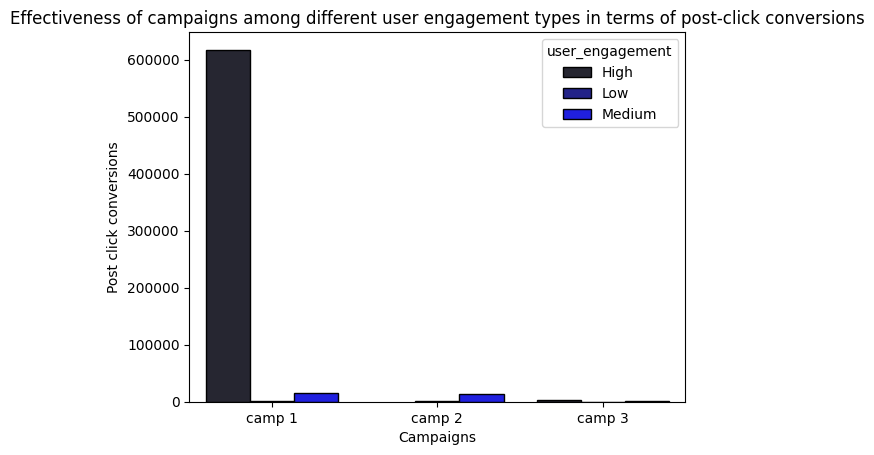

In [ ]:
k=dataset.groupby(['campaign_number','user_engagement'])['post_click_conversions'].sum()
k=k.reset_index(name='count')
sns.barplot(x='campaign_number',y='count',hue='user_engagement',data=k,color='blue',edgecolor='black')
plt.xlabel("Campaigns")
plt.ylabel("Post click conversions")
plt.title("Effectiveness of campaigns among different user engagement types in terms of post-click conversions")
plt.show()
